# Abstract 
In December 2019, a new coronavirus (2019-nCov) appeared in China, causing an international public health emergency within a few weeks.
The World Health Organization (WHO) recently classified it as a very high-risk virus. The International Committee on Taxonomy of Viruses (ICTV) designated this virus as the Severe Acute Respiratory Syndrome Coronavirus-2 (SARS-CoV-2) and the illness as Coronavirus Disease-19 (COVID-19). 
Out of the approximately 110,000 documented cases of this infection, the virus has killed close to 3,600 people as of March 8, 2020. In this editorial, the most important facts and features about COVID-19—an emerging coronavirus infection—its causative virus, SARS-CoV-2, the current global situation, and recent and ongoing efforts to contain and control the disease—which has now spread to over 100 countries worldwide—are briefly reviewed. 
Notably, scientists and health organizations from all over the world are working together to stop the virus's spread and prevent a pandemic, which would otherwise endanger the lives of millions of people.


# Acknowledgment
I want to sincerely thank all of the people and institutions that helped to make this initiative a success, whether directly or indirectly.
We are especially grateful to the public health organizations and data suppliers for making the COVID-19 datasets accessible, since this allowed for insightful research and education. I am also appreciative of the advice, materials, and tools like Python, Pandas, and NumPy that my teachers, peers, and the open-source community provided in order to make this project possible.
Finally, I want to thank the frontline staff, researchers, and healthcare professionals around the world for their tremendous efforts in fighting the epidemic and producing the important data needed in studies like these.

# Table Of Content

    * Abstract
    * Acknowledgment
    * The Dataset Features
    * load the necessary Python libraries
    * Missing Values
    * Duplicates
    * Features
    * Data Cleaning
    * Exploratory Data Analysis, exploring patterns using visualizations
    * Descriptive Summary
    * Anomaly Detection & Handling
    * ML-Based Methods
    * Handling Outliers
    * Data Normalization (Scaling)
    * Dimensionality Reduction
    * Domain-specific data preparation
    * Preparing Input & Target Data (X, y)
    * Normalization & Reasoning
    * Modelling & Predictions
    * Visualisation for Evaluation
    * Baseline ML Models
    * Hyperparameter Tuning
    * Evaluation & Reflection
    * Conclusion
    * References


# The Dataset Features
## Patient-level features

    * ICD10_codes: The diagnosis code based on the International Classification of Diseases, 10th Revision (ICD-10). This identifies the specific disease, condition, or diagnosis.

    * Age: The age of the patient at the time of diagnosis or hospital admission.

    * Gender: The gender of the patient (e.g., Male, Female, Other).

    * Admission_Type: The type of hospital admission, such as emergency, elective, or urgent.

    * Discharge_Disposition: Describes where the patient went after discharge (e.g., home, transferred to another facility, deceased).

    * Length_of_Stay: The total number of days the patient spent in the hospital.

    * Comorbidities: Number or list of additional diseases/conditions present in the patient, aside from the primary diagnosis.

    * Treatment_Cost: The cost incurred during the patient's treatment period.

    * ICU_Flag: Indicates whether the patient was admitted to the ICU (1 = Yes, 0 = No).

    * Outcome: The final result of the case (e.g., Recovered, Deceased, Transferred).

# COVID-19 Deaths Data Analysis (2020–2023)
## The COVID-19 death rate information gathered from 2020 to 2023 is examined and prepared in this project.  
## The primary goals are:
    * Find out which medical disorders, or comorbidities, were the main cause of COVID-19 fatalities.
    * Find trends throughout time, states, and age groupings.
    * Get the data ready for predictive modeling in the future.

# load the necessary Python libraries.
 * pandas: for data handling
 * numpy: for numerical operations
 * matplotlib and seaborn: for visualizing data

In [102]:
# tabular and numeric data
import pandas as pd
import numpy as np
# missing number visualization
import missingno as msno
import nbconvert

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# to make up to 200 data columns show in display:
pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings('ignore')


In [103]:
# Loading the given (CSV format file) data set from google drive
url = "https://drive.google.com/uc?export=download&id=1H48nO6Q3tUXQNqknFgBObKQKMUgTyJ8J"

In [104]:
data = pd.read_csv(url)
data

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,6/25/2023,1/1/2020,6/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1554.0,1630.0,NaN
1,6/25/2023,1/1/2020,6/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5775.0,5998.0,NaN
2,6/25/2023,1/1/2020,6/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15026.0,15643.0,NaN
3,6/25/2023,1/1/2020,6/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37335.0,38794.0,NaN
4,6/25/2023,1/1/2020,6/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82382.0,85404.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583735,6/25/2023,2/1/2023,2/28/2023,By Month,2023.0,2.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,99.0,99.0,NaN
583736,6/25/2023,3/1/2023,3/31/2023,By Month,2023.0,3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,50.0,50.0,NaN
583737,6/25/2023,4/1/2023,4/30/2023,By Month,2023.0,4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,44.0,44.0,NaN
583738,6/25/2023,5/1/2023,5/31/2023,By Month,2023.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,65.0,65.0,NaN


In [105]:
##The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583740 entries, 0 to 583739
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          583740 non-null  object 
 1   Start Date          583740 non-null  object 
 2   End Date            583740 non-null  object 
 3   Group               583740 non-null  object 
 4   Year                571320 non-null  float64
 5   Month               521640 non-null  float64
 6   State               583740 non-null  object 
 7   Condition Group     583740 non-null  object 
 8   Condition           583740 non-null  object 
 9   ICD10_codes         583740 non-null  object 
 10  Age Group           583740 non-null  object 
 11  COVID-19 Deaths     411171 non-null  float64
 12  Number of Mentions  416761 non-null  float64
 13  Flag                172569 non-null  object 
dtypes: float64(4), object(10)
memory usage: 62.4+ MB


# Missing Values
## Finding the missing values

In [106]:
print("Total rows:", len(data), "\n")

nullcounts = data.isnull().sum().rename("# NA").to_frame()
nullcounts["% NA"] = nullcounts["# NA"] / len(data) * 100
nullcounts[nullcounts["# NA"] > 0].style.format(precision=2)

Total rows: 583740 



,# NA,% NA
Year,12420,2.13
Month,62100,10.64
COVID-19 Deaths,172569,29.56
Number of Mentions,166979,28.61
Flag,411171,70.44


### We can quickly investigate whether the missing values are dispersed randomly, as would be more natural, or in a cluster, which might suggest some data loss or systematic missing values:

### Real-world datasets often contain missing values, represented as NaN (Not a Number) values. To build a good machine learning model, imputation techniques replace NaN values with probable ones. The Missingno library, compatible with Pandas, provides a visual representation of NaN values distribution.

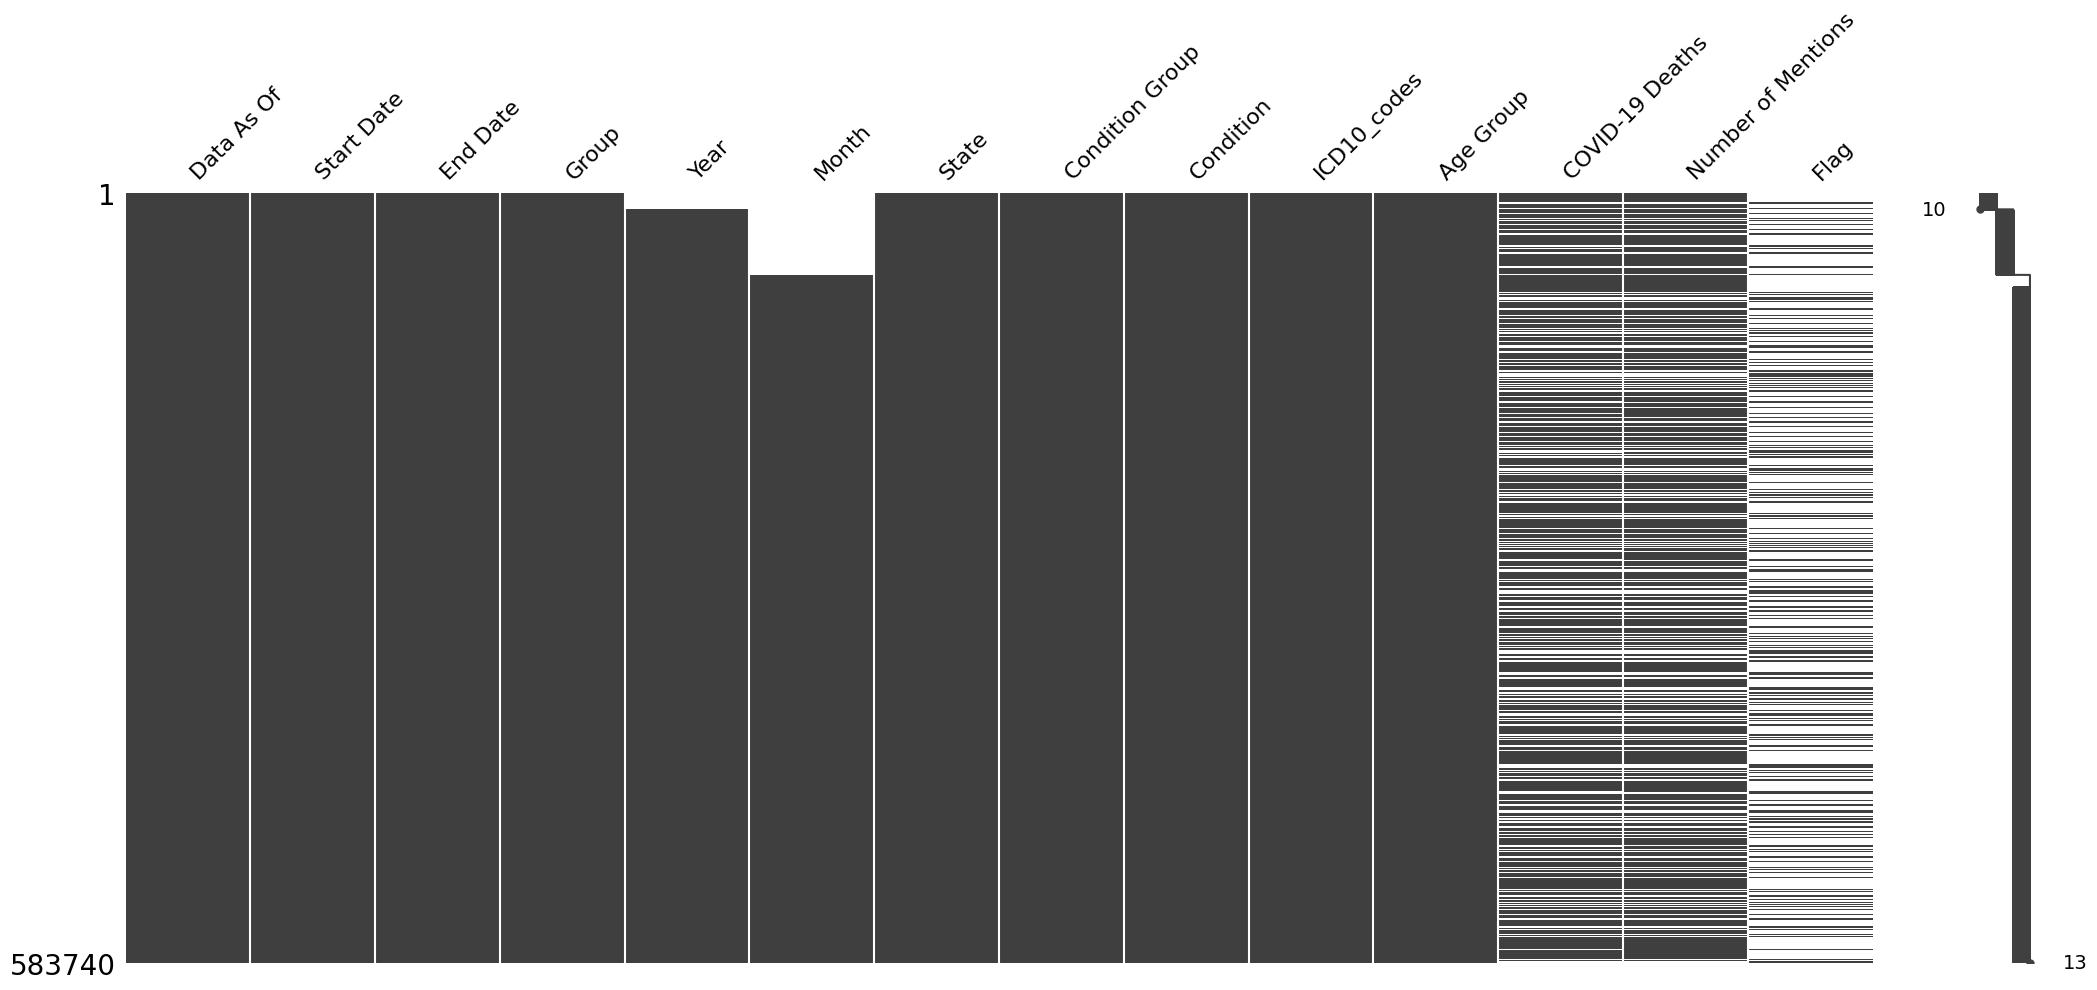

In [107]:
msno.matrix(data);

## Dealing with missing values
     * To handle missing values in pandas, drop a column or impute them using mean, median, and mode using functions like fillna, dropna, bfill, and interpolate.


## Before using dropna(), we need to evaluate whether dropping all rows with any missing values is appropriate, based on how much data would be lost and how essential the missing columns are.

     1-Drop only the ** Flag ** column (too many missing values, and likely not useful).

     2-Handle critical columns (COVID-19 Deaths, Number of Mentions) carefully:

         * Option 1: Drop rows with missing values in just these columns.

         * Option 2: Impute missing values if you can justify it (e.g., set to 0 or use mean/median if logical).

     3-Consider imputation for ** Year ** and ** Month ** (e.g., forward-fill or back-fill if time-based).

In [108]:
# Drop the Flag column due to excessive missing values
data.drop(columns=['Flag'], inplace=True)

# Drop rows with missing values only in important columns
data.dropna(subset=['COVID-19 Deaths', 'Number of Mentions'], inplace=True)

# Impute missing Year and Month if needed (optional)
data['Year'].fillna(method='ffill', inplace=True)
data['Month'].fillna(method='bfill', inplace=True)

print(data.shape)


(411171, 13)


In [109]:
data.fillna(0, inplace=True)  # Fill missing values (e.g., with 0 or column mean)

In [110]:
### see the count of missing values per column:
### This will show you which columns still contain NaN/NA values.
print(data.isnull().sum())


Data As Of            0
Start Date            0
End Date              0
Group                 0
Year                  0
Month                 0
State                 0
Condition Group       0
Condition             0
ICD10_codes           0
Age Group             0
COVID-19 Deaths       0
Number of Mentions    0
dtype: int64


In [111]:
data[data.isnull().any(axis=1)].head()


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions


In [112]:
# After all NA handling
## assert (data.isnull().sum() == 0).all(), "NA values remaining!"
assert data.isnull().sum().sum() == 0, "NA values still exist!"
print("No missing values left! ✅")

No missing values left! ✅


# Duplicates
## Check if our COVID-19 dataset contains duplicate rows and/or duplicate ID's.

In [113]:
print(data.duplicated().sum(), "duplicate rows")
print(data.duplicated(subset=["ICD10_codes"]).sum(), "duplicate IDs")

0 duplicate rows
411148 duplicate IDs


### This indicates that while several rows have the same ICD10_codes, they differ in other fields (such as timestamps, patient information, etc.).  If every row uses the same diagnosis code to reflect a distinct case or record, then this is typical.
### When this is not an issue: You're examining records at the patient level or the use of diagnoses (e.g., the frequency of specific ICD10 codes).
 * Instead of treating each ICD10 code as a distinct ID, you want to group or analyze them according to these codes.

### When this is an issue: For example, in a reference table where each code corresponds to a single definition or condition, you are considering ICD10_codes as a primary key.
 * You intend to utilize ICD10_codes as a unique join key when merging data with another dataset (duplication will result).

# Features
## After these all steps our data now

In [114]:
data

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,6/25/2023,1/1/2020,6/24/2023,By Total,0.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1554.0,1630.0
1,6/25/2023,1/1/2020,6/24/2023,By Total,0.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5775.0,5998.0
2,6/25/2023,1/1/2020,6/24/2023,By Total,0.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15026.0,15643.0
3,6/25/2023,1/1/2020,6/24/2023,By Total,0.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37335.0,38794.0
4,6/25/2023,1/1/2020,6/24/2023,By Total,0.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82382.0,85404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583735,6/25/2023,2/1/2023,2/28/2023,By Month,2023.0,2.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,99.0,99.0
583736,6/25/2023,3/1/2023,3/31/2023,By Month,2023.0,3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,50.0,50.0
583737,6/25/2023,4/1/2023,4/30/2023,By Month,2023.0,4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,44.0,44.0
583738,6/25/2023,5/1/2023,5/31/2023,By Month,2023.0,5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,65.0,65.0


In [115]:
## recheck the info:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411171 entries, 0 to 583739
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          411171 non-null  object 
 1   Start Date          411171 non-null  object 
 2   End Date            411171 non-null  object 
 3   Group               411171 non-null  object 
 4   Year                411171 non-null  float64
 5   Month               411171 non-null  float64
 6   State               411171 non-null  object 
 7   Condition Group     411171 non-null  object 
 8   Condition           411171 non-null  object 
 9   ICD10_codes         411171 non-null  object 
 10  Age Group           411171 non-null  object 
 11  COVID-19 Deaths     411171 non-null  float64
 12  Number of Mentions  411171 non-null  float64
dtypes: float64(4), object(9)
memory usage: 43.9+ MB


# Data Cleaning for
     * Ensure consistent column names
     * Remove missing or irrelevant rows
     * Convert date strings to usable date objects
     * Remove duplicate rows

In [116]:
## standardizes column names so that code can easily access.
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

In [117]:
##eliminates rows without death counts because they are essential to our study.
data = data[data['COVID_19_Deaths'].notna()]

In [118]:
##Assists with time-based analysis by making ensuring that date columns are appropriately interpreted as dates rather than strings.
data['Data_As_Of'] = pd.to_datetime(data['Data_As_Of'])
data['Start_Date'] = pd.to_datetime(data['Start_Date'])
data['End_Date'] = pd.to_datetime(data['End_Date'])


In [91]:
##Eliminates redundant records to prevent biased findings.
data.drop_duplicates(inplace=True)


# Exploratory Data Analysis, exploring patterns using visualizations

In [119]:
#View available columns
print(data.columns.tolist())


['Data_As_Of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month', 'State', 'Condition_Group', 'Condition', 'ICD10_codes', 'Age_Group', 'COVID_19_Deaths', 'Number_of_Mentions']


# Descriptive Summary

In [120]:
##Getting statistical summaries: mean, count, missing values
data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Data_As_Of,411171,NaN,NaN,NaN,2023-06-25 00:00:00.000000256,2023-06-25 00:00:00,2023-06-25 00:00:00,2023-06-25 00:00:00,2023-06-25 00:00:00,2023-06-25 00:00:00,NaN
Start_Date,411171,NaN,NaN,NaN,2021-08-08 14:46:49.511371264,2020-01-01 00:00:00,2020-09-01 00:00:00,2021-08-01 00:00:00,2022-07-01 00:00:00,2023-06-01 00:00:00,NaN
End_Date,411171,NaN,NaN,NaN,2021-11-05 08:29:03.881742080,2020-01-31 00:00:00,2020-12-31 00:00:00,2021-11-30 00:00:00,2022-10-31 00:00:00,2023-06-24 00:00:00,NaN
Group,411171,3,By Month,362188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,411171.0,NaN,NaN,NaN,1968.649022,0.0,2020.0,2021.0,2022.0,2023.0,321.87082
Month,411171.0,NaN,NaN,NaN,5.36003,1.0,2.0,5.0,8.0,12.0,3.627114
State,411171,54,United States,10810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition_Group,411171,12,Circulatory diseases,123751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition,411171,23,Vascular and unspecified dementia,20490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ICD10_codes,411171,23,"F01, F03",20490,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#Using Contributing Conditions
##This indicates which illnesses were most frequently linked to COVID-19-related fatalities.
data.groupby('Condition')['COVID_19_Deaths'].sum().sort_values(ascending=False).head(10)

Condition
COVID-19                                      13642075.0
Influenza and pneumonia                        6332108.0
All other conditions and causes (residual)     5655473.0
Respiratory failure                            5183109.0
Hypertensive diseases                          2517984.0
Diabetes                                       1987968.0
Cardiac arrest                                 1588259.0
Renal failure                                  1520524.0
Ischemic heart disease                         1497834.0
Sepsis                                         1393870.0
Name: COVID_19_Deaths, dtype: float64

<Axes: title={'center': 'Top 10 Most Common Conditions'}, ylabel='Condition'>

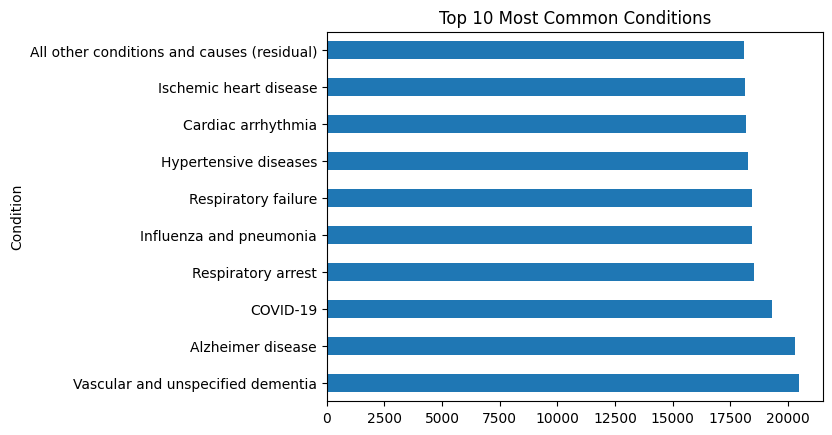

In [122]:
# Replace 'Condition' with the actual column name in your dataset
condition_summary = data['Condition'].value_counts().head(10)

# Now plot
condition_summary.plot(kind='barh', title='Top 10 Most Common Conditions')


# Anomaly Detection & Handling
## Non-ML Methods
 * Boxplot Method (IQR-based)

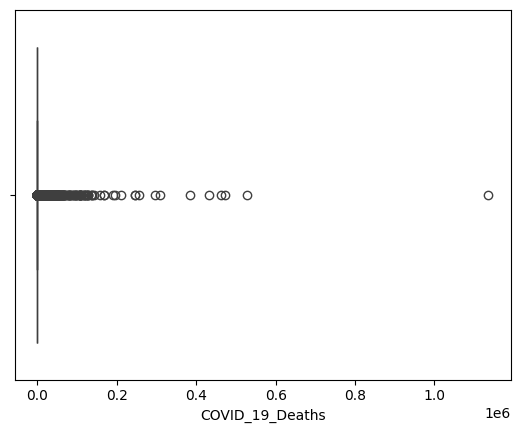

Outliers found: 62086


In [125]:
sns.boxplot(x=data['COVID_19_Deaths'])  # replace with your column
plt.show()

# IQR-based detection
Q1 = data['COVID_19_Deaths'].quantile(0.25)
Q3 = data['COVID_19_Deaths'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data['COVID_19_Deaths'] < lower_bound) | (data['COVID_19_Deaths'] > upper_bound)]
print("Outliers found:", len(outliers))

# ML-Based Methods

In [127]:
print(data.columns.tolist())


['Data_As_Of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month', 'State', 'Condition_Group', 'Condition', 'ICD10_codes', 'Age_Group', 'COVID_19_Deaths', 'Number_of_Mentions']


In [128]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)  # set contamination level
data['anomaly'] = model.fit_predict(data[['COVID_19_Deaths', 'Number_of_Mentions']])
outliers = data[data['anomaly'] == -1]


In [129]:
# Detect columns with object (categorical) data types
object_cols = data.select_dtypes(include='object').columns.tolist()

# Print summary of categorical features
print(len(object_cols), "categorical features:")
print("\t", object_cols)

6 categorical features:
	 ['Group', 'State', 'Condition_Group', 'Condition', 'ICD10_codes', 'Age_Group']


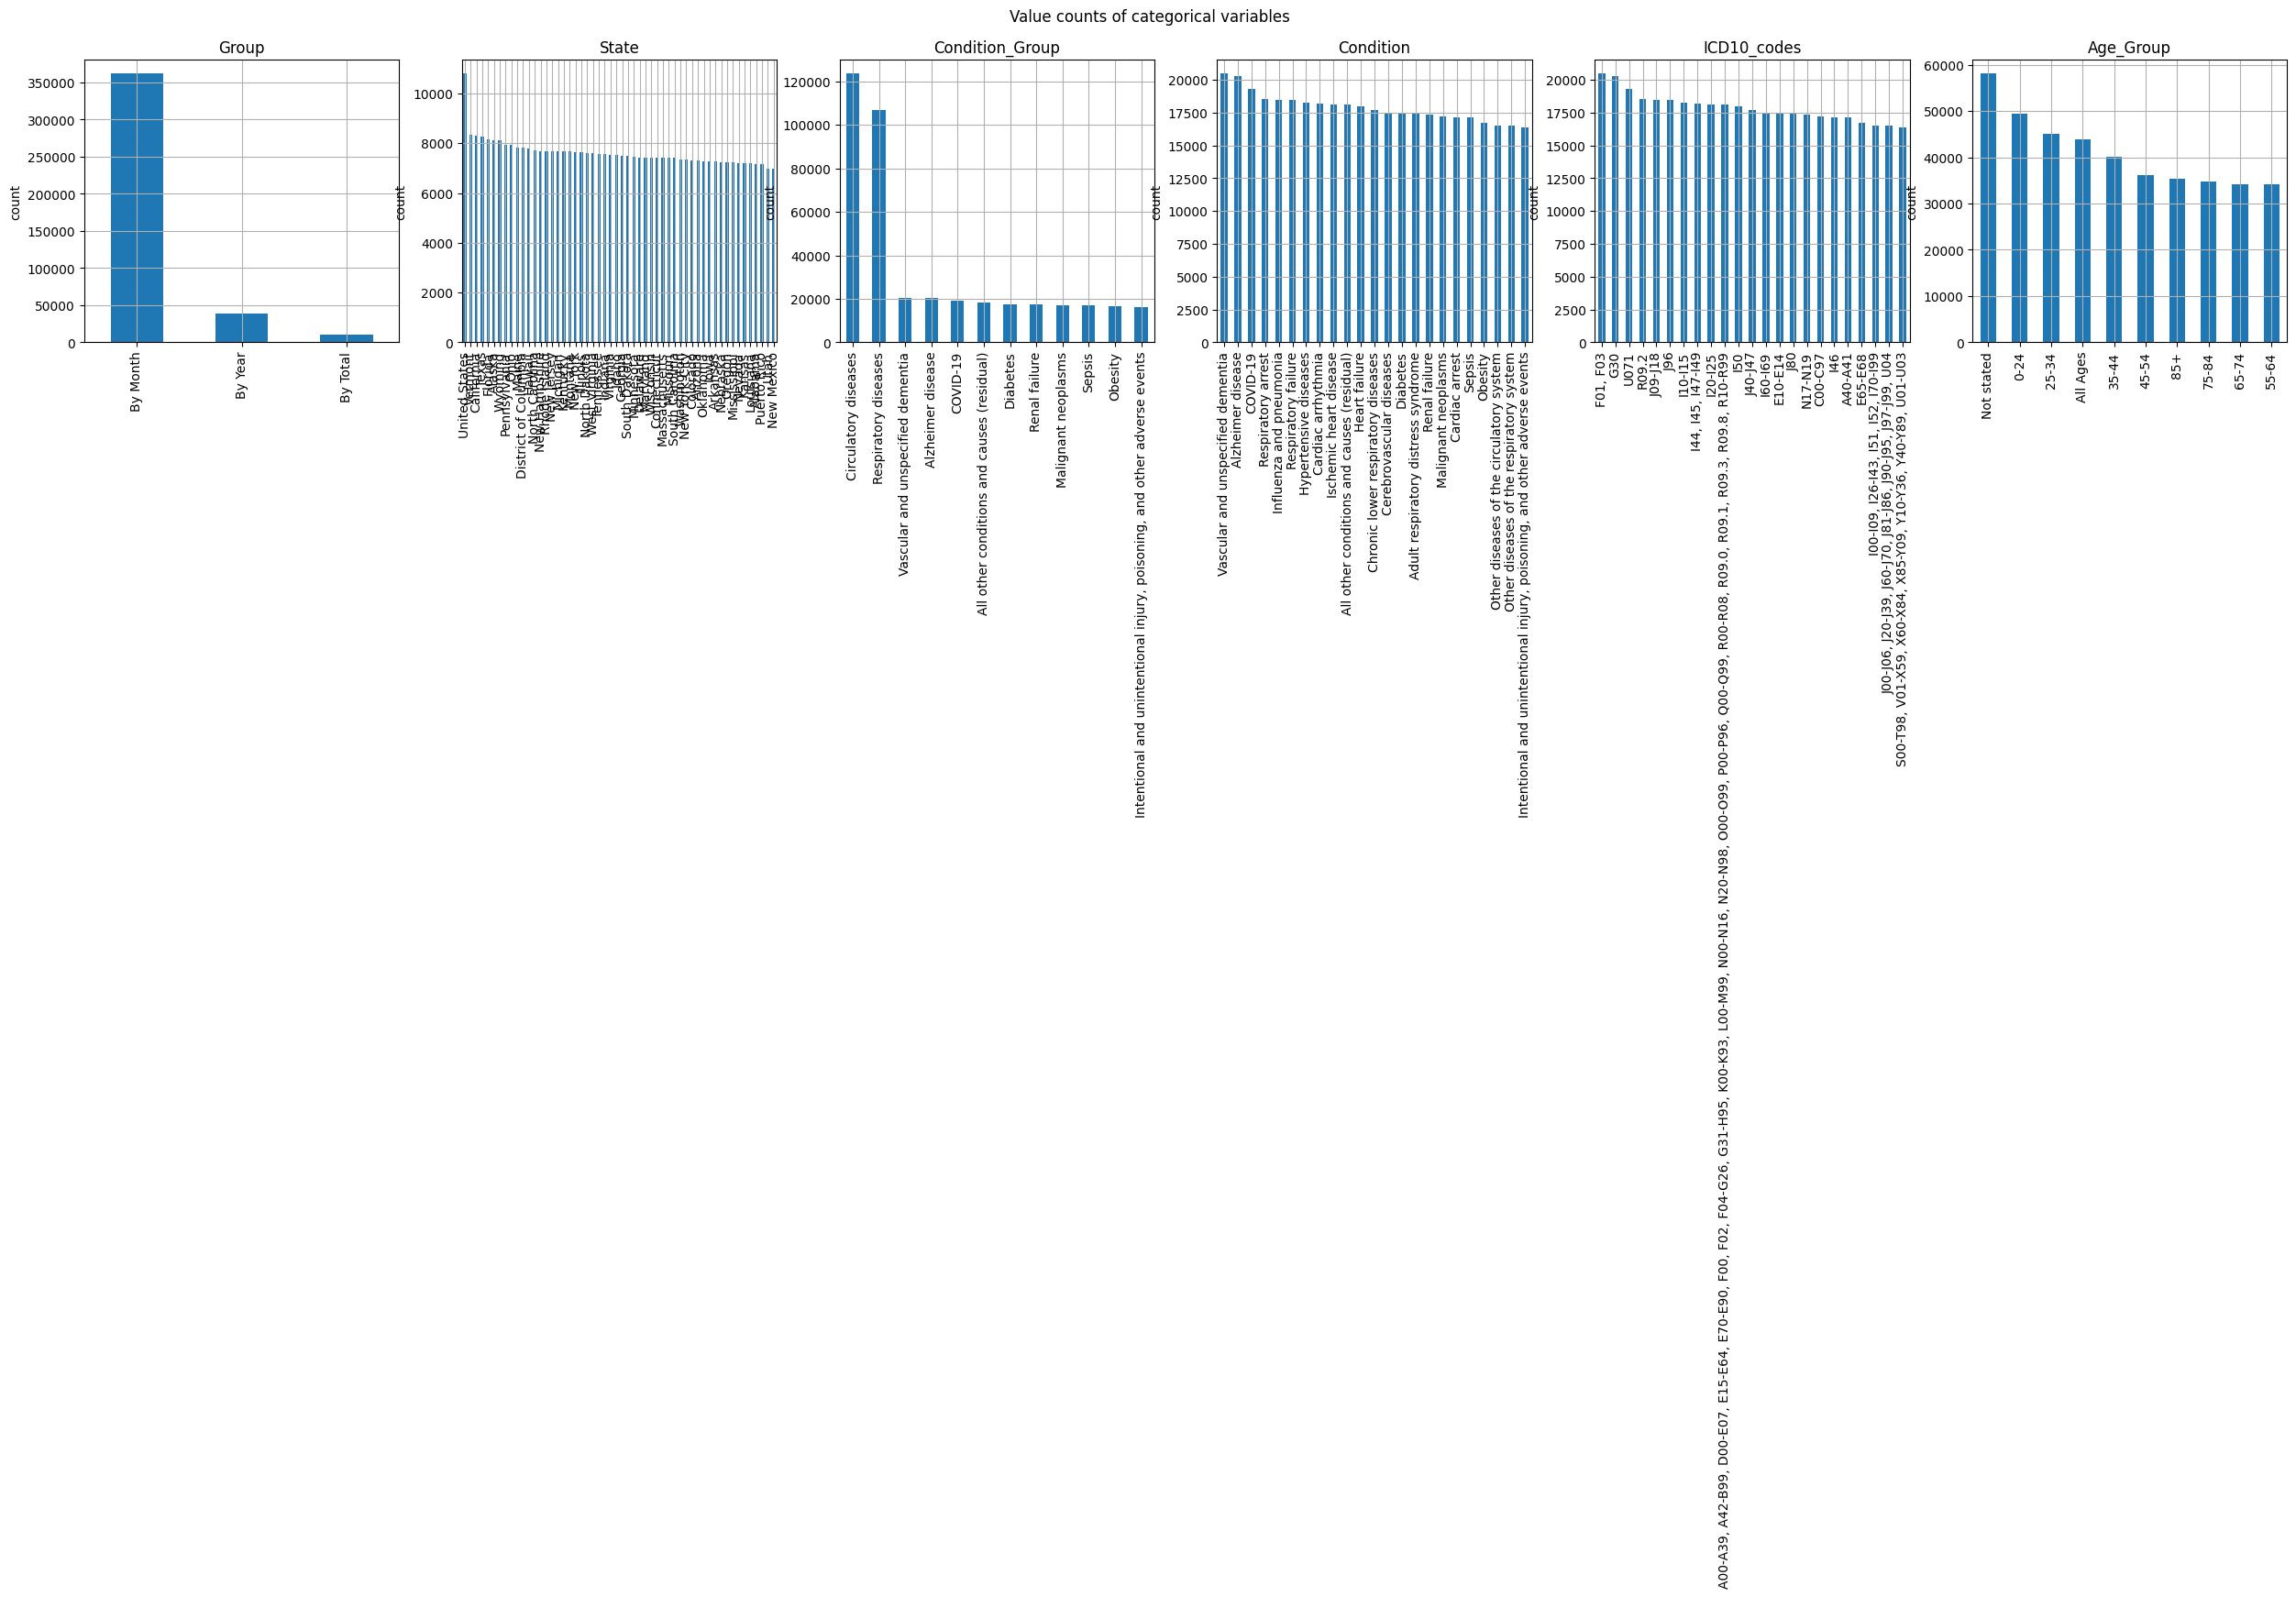

In [130]:
## multi-subplot figure, with each column in a separate column.
fig, axs = plt.subplots(figsize=(len(object_cols)*5+1,4), ncols=len(object_cols))
## let's move the super title a little upwards for nicer looks
plt.suptitle('Value counts of categorical variables',y=1.02)
## plot each of the categorical columns' value counts in its own subplot:
for i, col in enumerate(object_cols):
    ax = axs[i]
    data[col].value_counts().plot.bar(ylabel="count", ax=ax, grid=True, title=col, xlabel="")
plt.show()


# Handling Outliers
## Clipping

In [132]:
data['COVID_19_Deaths'] = data['COVID_19_Deaths'].clip(lower=lower_bound, upper=upper_bound)

## Transformation

In [133]:
## Log, square root, or Box-Cox transformations to reduce skew:
data['COVID-19 Deathst_log'] = np.log1p(data['COVID_19_Deaths'])

# Data Normalization (Scaling)
### Most ML models (especially distance-based like k-NN, SVM, or gradient descent-based like logistic regression) are sensitive to feature scale differences.

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Deaths_scaled', 'Mentions_scaled']] = scaler.fit_transform(data[['COVID_19_Deaths', 'Number_of_Mentions']])

## MinMaxScaler

In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Deaths_minmax', 'Mentions_minmax']] = scaler.fit_transform(data[['COVID_19_Deaths', 'Number_of_Mentions']])

# RobustScaler

In [138]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data[['Deaths_robust', 'Mentions_robust']] = scaler.fit_transform(data[['COVID_19_Deaths', 'Number_of_Mentions']])

# Dimensionality Reduction

### If we have many numeric features or one-hot encoded categories (like ICD-10 codes, states, or age groups).

### PCA (Principal Component Analysis)
    * Best for numeric data, good for visualization or model speed-up:

In [139]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[['Deaths_scaled', 'Mentions_scaled']])

### UMAP or t-SNE
    * Great for 2D visualization of high-dimensional, categorical-heavy data (like conditions, states, age groups):

In [140]:
import umap.umap_ as umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(data[['Deaths_scaled', 'Mentions_scaled']])

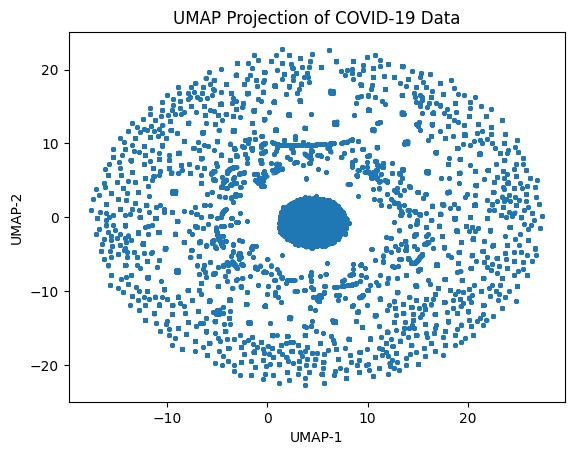

In [141]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.7)
plt.title('UMAP Projection of COVID-19 Data')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()


# Domain-specific data preparation
## Time Series Preparation

## Detrending / Deseasonalizing

<Axes: title={'center': 'Detrended Deaths'}, xlabel='Month'>

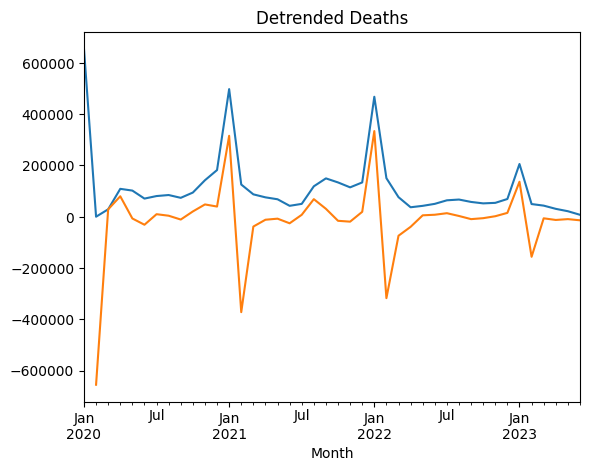

In [144]:
data['Start_Date'] = pd.to_datetime(data['Start_Date'])

# Optional: Aggregate by month
data['Month'] = data['Start_Date'].dt.to_period('M')
monthly = data.groupby('Month')['COVID_19_Deaths'].sum().to_timestamp()

# Detrending with differencing
monthly_diff = monthly.diff().dropna()

# Plot
monthly.plot(title='Monthly COVID-19 Deaths')
monthly_diff.plot(title='Detrended Deaths')


## Smoothing 
### To remove short-term noise

<Axes: title={'center': 'Smoothed Monthly COVID-19 Deaths'}, xlabel='Month'>

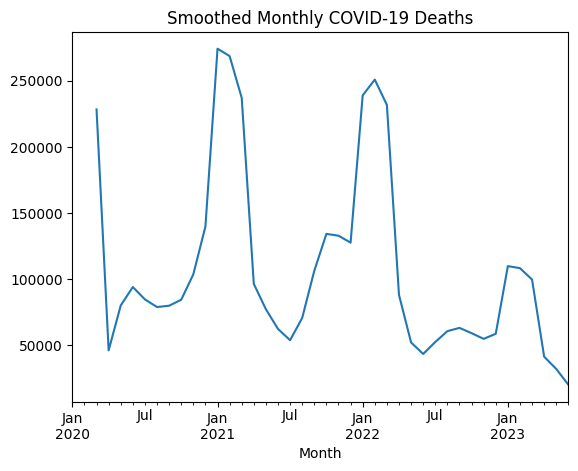

In [145]:
monthly_rolling = monthly.rolling(window=3).mean()
monthly_rolling.plot(title='Smoothed Monthly COVID-19 Deaths')

## Preparing Input & Target Data (X, y)

In [146]:
print(data.columns.tolist())

['Data_As_Of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month', 'State', 'Condition_Group', 'Condition', 'ICD10_codes', 'Age_Group', 'COVID_19_Deaths', 'Number_of_Mentions', 'anomaly', 'COVID-19 Deathst_log', 'Deaths_scaled', 'Mentions_scaled', 'Deaths_minmax', 'Mentions_minmax', 'Deaths_robust', 'Mentions_robust']


In [148]:
X = data[['Number_of_Mentions', 'Age_Group', 'Condition_Group', 'State']]
y = data['COVID_19_Deaths']

In [149]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

## Normalization & Reasoning

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-Test Split (with Validation Set)

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, shuffle=True, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Use Pipelines to Avoid Data Leakage

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Do scaling only on training set
    ('model', RandomForestRegressor())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

# Modelling & Predictions

## Evaluation Metrics: Choose Based on Task Type
     * Since your task is regression (predicting a numeric value):

In [153]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [154]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.19798044488036484
RMSE: 0.7427957533775562
R²: 0.9982877784081443


# Visualisation for Evaluation

## True vs Predicted Scatter Plot:

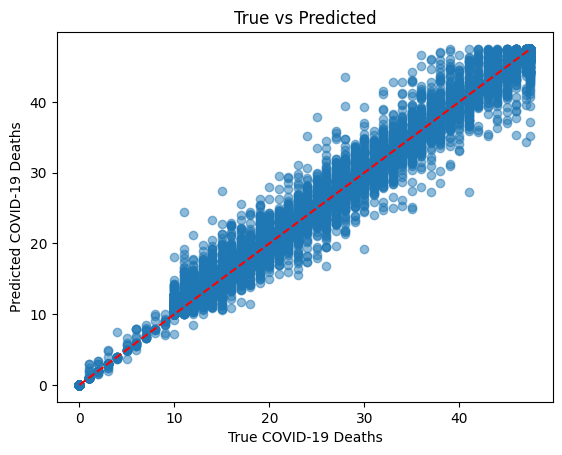

In [155]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True COVID-19 Deaths")
plt.ylabel("Predicted COVID-19 Deaths")
plt.title("True vs Predicted")
plt.show()

## Residuals plot:

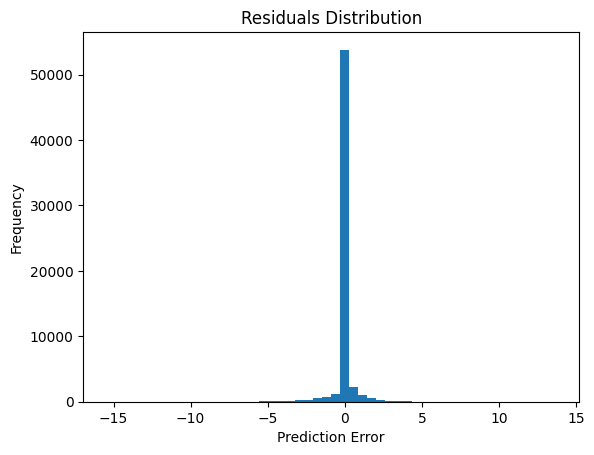

In [156]:
residuals = y_test - y_pred
plt.hist(residuals, bins=50)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()


# Baselines (Non-ML)

## Non-ML Baselines:
    * Mean baseline: Predict the mean of the target variable

    * Rolling average (if time series)

    * Last value: Predict the last known value (time series)

In [157]:
baseline_pred = [y_train.mean()] * len(y_test)
print("MAE (Baseline):", mean_absolute_error(y_test, baseline_pred))

MAE (Baseline): 15.040997786505399


# Baseline ML Models

## Linear Regression:
### Pros:

    * Interpretable

    * Fast

### Cons:

    * Linear assumptions

    * Sensitive to multicollinearity

    * Evaluate with the same metrics.

In [158]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Advanced ML Models

## Random Forest Regressor
     * Good for tabular data

     * Handles nonlinear relationships

     * Not sensitive to scaling (but you already used StandardScaler in pipeline)

In [159]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Hyperparameter Tuning 

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [5, 10, 20]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'model__max_depth': 20, 'model__n_estimators': 150}


# Evaluation & Reflection

## Reflect on:
    * Performance against baselines: Does your model significantly improve over baseline?

    * Overfitting?: Check train vs test scores

    * Model interpretability: Was it more important to explain or to predict?

    * Business/health relevance: Are certain conditions, age groups or states showing predictive power?

    * Impact of outliers or skewed distributions on results

# Conclusion

In order to learn more about the features and trends of the pandemic, we investigated and processed a dataset pertaining to COVID-19 for this research. We prepared the data for analysis and modeling by performing data preparation procedures, such as addressing missing values, encoding categorical variables, and discretizing continuous features.
We used discretization techniques to simplify numerical variables like **clock_speed**, which may represent features like symptom severity or resource usage, and one-hot encoding to convert categorical data like **price_range** (or comparable health-related categories) into a format appropriate for machine learning algorithms.
The information obtained from this data may help policymakers and medical professionals comprehend COVID-19 risk factors, resource allocation, and spread patterns. Now that the dataset has been cleaned and processed, it can be used for other modeling tasks including forecasting hospitalization requirements, patient outcomes, or infection severity.

All things considered, this research showed how crucial thorough data preprocessing is to creating trustworthy data-driven technologies that aid in public health responses during pandemics.


# References

In [ ]:
https://www.python.org/
https://stackoverflow.com/

https://chat.openai.com/chat
https://www.researchgate.net/publication/339848627_COVID-19_an_Emerging_Coronavirus_Infection_Current_Scenario_and_Recent_Developments_-_An_Overview
https://skolar.ai/